<a href="https://colab.research.google.com/github/andrejtodorovski/Vnp/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'>
<ul>We are using the same dataset as the previous laboratory exercise, now you need to build Neural networks</ul>

<li>Build three different networks with using:</li>
different layers, activation functions, neurans per layers, number of layers
<li>train your network and set the optimal number of epochs and batch size</li>
<li>Evaluate the three networks on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [368]:
import pandas as pd
import numpy as np

In [369]:
data = pd.read_csv('/content/sample_data/winequality-red.csv')

In [370]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [372]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Making a binary attribute instead of multiclass

In [373]:
quality = []
for i in data['quality']:
    if i >= 1 and i <= 5:
        quality.append('bad')
    elif i >= 6 and i <= 9:
        quality.append('good')
data.drop(['quality'],axis=1)
data['quality'] = quality

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [375]:
data.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

Encoding the target value and scaling everything

In [376]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [377]:
encoder = LabelEncoder()
data['quality'] = encoder.fit_transform(data['quality'])


In [378]:
data.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [379]:
X = data.drop('quality', axis = 1)
Y = data['quality']

In [380]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [381]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3 networks with different layers, activation functions, neurans per layers, number of layers

**First Network**

In [382]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model1 = Sequential()
model1.add(Dense(16, input_dim=11, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [383]:
model1.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_198 (Dense)           (None, 16)                192       
                                                                 
 dense_199 (Dense)           (None, 8)                 136       
                                                                 
 dense_200 (Dense)           (None, 8)                 72        
                                                                 
 dense_201 (Dense)           (None, 4)                 36        
                                                                 
 dense_202 (Dense)           (None, 1)                 5         
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [384]:
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy']) 


In [401]:
history1 = model1.fit(X_train, Y_train, epochs=100, batch_size=16)


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.8546
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.8577
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.8600
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.8600
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.8561
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.8600
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.8632
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1112 - accuracy: 0.8616
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.8600
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.8577
Epoch 11/

In [402]:
y_pred_1 = model1.predict(X_test) 
y_pred_1 = y_pred_1.round()

10/10 [==============================] - 0s 2ms/step


accuracy of the model:  0.73125


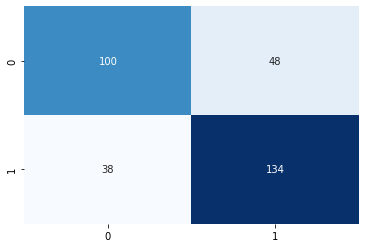

In [403]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(Y_test, y_pred_1.round())
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", cbar=False)

ac1 = accuracy_score(Y_test, y_pred_1.round())
print('accuracy of the model: ', ac1)

Second network

In [404]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model2 = Sequential()
model2.add(Dense(256, input_dim=11, activation='relu'))
model2.add(Dropout(0.1, input_shape=(256,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1, input_shape=(128,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1, input_shape=(64,)))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1, input_shape=(32,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [405]:
model2.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_217 (Dense)           (None, 256)               3072      
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_218 (Dense)           (None, 128)               32896     
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_219 (Dense)           (None, 64)                8256      
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_220 (Dense)           (None, 32)              

In [406]:
model2.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy']) 


In [391]:
history2 = model2.fit(X_train, Y_train, epochs=100, batch_size=32)


Epoch 1/100
40/40 [==============================] - 1s 4ms/step - loss: 0.2335 - accuracy: 0.6466
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2140 - accuracy: 0.7443
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1977 - accuracy: 0.7654
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.7670
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1652 - accuracy: 0.7623
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1582 - accuracy: 0.7780
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1576 - accuracy: 0.7866
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1524 - accuracy: 0.7842
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 0.1517 - accuracy: 0.7944
Epoch 10/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1460 - accuracy: 0.8100
Epoch 11/

In [392]:
y_pred_2 = model2.predict(X_test) 
y_pred_2 = y_pred_2.round()

10/10 [==============================] - 0s 2ms/step


accuracy of the model:  0.778125


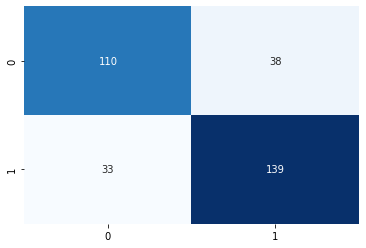

In [393]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm2 = confusion_matrix(Y_test, y_pred_2.round())
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", cbar=False)

ac2 = accuracy_score(Y_test, y_pred_2.round())
print('accuracy of the model: ', ac2)

Third network

In [394]:
model3 = Sequential()
model3.add(Dense(256, kernel_initializer='uniform', activation='relu', input_dim=11))
model3.add(Dropout(0.1, input_shape=(256,)))
model3.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model3.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


In [395]:
model3.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy']) 


In [396]:
history3 = model3.fit(X_train, Y_train, epochs=100, batch_size=64)


Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.2487 - accuracy: 0.5285
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2087 - accuracy: 0.7060
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1814 - accuracy: 0.7404
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1707 - accuracy: 0.7482
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.7545
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1637 - accuracy: 0.7623
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1615 - accuracy: 0.7662
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.7701
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1545 - accuracy: 0.7842
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1558 - accuracy: 0.7756
Epoch 11/

In [397]:
y_pred_3 = model3.predict(X_test) 
y_pred_3 = y_pred_3.round()

10/10 [==============================] - 0s 2ms/step


accuracy of the model:  0.778125


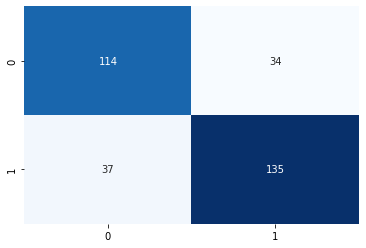

In [398]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm3 = confusion_matrix(Y_test, y_pred_3.round())
sns.heatmap(cm3, annot=True, cmap="Blues", fmt="d", cbar=False)

ac3 = accuracy_score(Y_test, y_pred_3.round())
print('accuracy of the model: ', ac3)

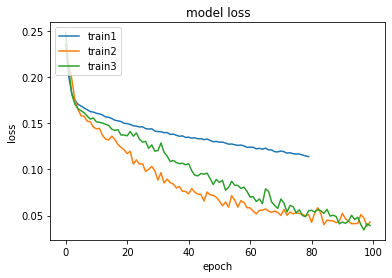

In [399]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1','train2','train3'], loc='upper left')
plt.show()

Text(0, 0.5, 'Accuracy')

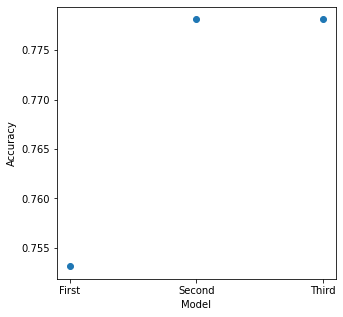

In [400]:
xindex = ['First','Second', 'Third']
yindex = [ac1,ac2,ac3]

plot = plt.figure(figsize=(5,5))
plt.scatter(xindex, yindex)
plt.xlabel('Model')
plt.ylabel('Accuracy')
     